In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━

In [4]:
from pycaret.datasets import get_data#step1

In [5]:
data = get_data('insurance')# setp2

# yes , no
# 1   , 0
# 1   , 0

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Convert categorical data into one hot encode

In [10]:
df = pd.DataFrame({"Sex":["Femal","Male","Other"]})
df

,Sex
0,Femal
1,Male
2,Other


In [11]:
pd.get_dummies(df["Sex"])

,Femal,Male,Other
0,1,0,0
1,0,1,0
2,0,0,1


# Create firs pycaret Regression Model

In [20]:
from pycaret.regression import * # step3

In [21]:
s = setup(data, target="charges") #step4

,Description,Value
0,session_id,1799
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [25]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [26]:
data.children.unique()

array([0, 1, 3, 2, 5, 4])

In [27]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2613.9447,2.224842e+07,4659.2061,0.8408,0.4394,0.3029,0.064
lightgbm,Light Gradient Boosting Machine,2820.5437,2.341721e+07,4783.0533,0.8324,0.5469,0.3545,0.108
rf,Random Forest Regressor,2722.3897,2.382751e+07,4831.4738,0.8306,0.4721,0.3360,0.291
ada,AdaBoost Regressor,3906.0840,2.703599e+07,5164.9875,0.8041,0.5931,0.6492,0.020
et,Extra Trees Regressor,2775.5822,2.809488e+07,5253.6049,0.8009,0.4873,0.3262,0.217
llar,Lasso Least Angle Regression,4212.2982,3.718472e+07,6037.8298,0.7344,0.5420,0.4179,0.009
ridge,Ridge Regression,4232.5666,3.723164e+07,6041.8543,0.7341,0.5382,0.4210,0.008
br,Bayesian Ridge,4230.4271,3.723329e+07,6042.1298,0.7341,0.5386,0.4206,0.010
lasso,Lasso Regression,4222.1759,3.723246e+07,6042.4252,0.7339,0.5407,0.4192,0.010
lr,Linear Regression,4223.5690,3.724255e+07,6043.3765,0.7338,0.5405,0.4193,0.242


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1799, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [28]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1799, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


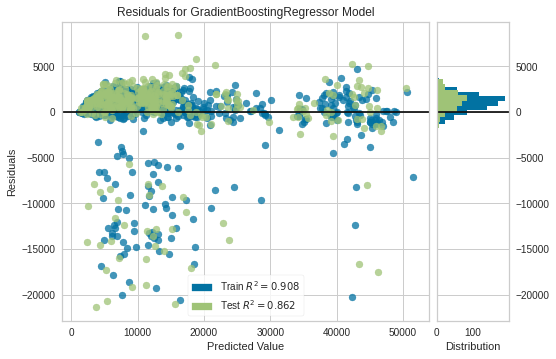

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(best, plot='residuals')

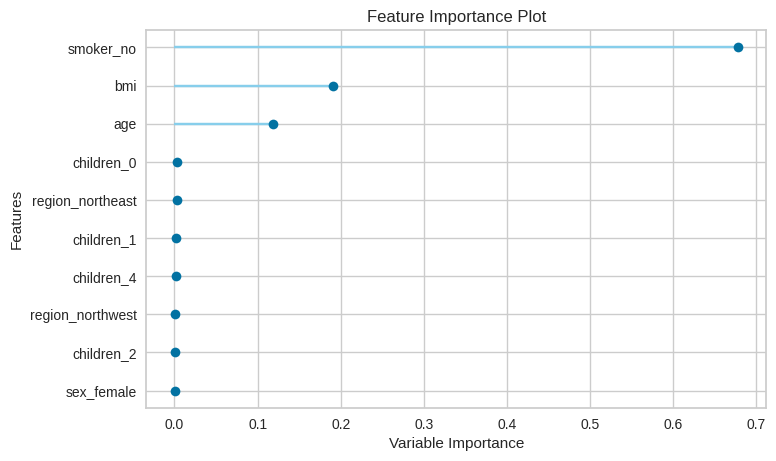

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(best, plot = 'feature')

In [31]:
predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1799, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing disp

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2581.7478,2.079842e+07,4560.528,0.8617,0.4105,0.2943


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,19.0,25.555000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2221.564453,3517.080377
1,59.0,37.400002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,21797.000000,13685.312630
2,19.0,29.070000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17352.679688,17530.008576
3,43.0,24.700001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21880.820312,22526.529279
4,28.0,26.510000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4340.440918,5913.492107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,52.0,34.485001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60021.398438,43341.167161
398,47.0,27.830000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23065.419922,25000.868458
399,61.0,33.330002,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,36580.281250,15596.359034
400,51.0,33.915001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9866.304688,11555.565193


In [ ]:
predictions = predict_model(best, data=data)
predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,19,female,27.900,0,yes,southwest,16884.92400,18737.529873
1,18,male,33.770,1,no,southeast,1725.55230,2879.484676
2,28,male,33.000,3,no,southeast,4449.46200,6359.290951
3,33,male,22.705,0,no,northwest,21984.47061,12429.083726
4,32,male,28.880,0,no,northwest,3866.85520,4657.633883


# Save model

In [32]:
save_model(best, 'my_best_pipline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1799, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), model_name=my_best_pipline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

# Load model

In [33]:
loaded_model = load_model("my_best_pipline")
print(loaded_model)

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=my_best_pipline, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_dec

In [34]:
df1 = predict_model(loaded_model,data)
df1

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                        

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2169.3748,1.558402e+07,3947.6602,0.8937,0.3503,0.2502


,age,sex,bmi,children,smoker,region,charges,Label
0,19,female,27.900,0,yes,southwest,16884.92400,17645.416449
1,18,male,33.770,1,no,southeast,1725.55230,3117.415065
2,28,male,33.000,3,no,southeast,4449.46200,5317.475426
3,33,male,22.705,0,no,northwest,21984.47061,7760.189538
4,32,male,28.880,0,no,northwest,3866.85520,3914.042036
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,10634.564330
1334,18,female,31.920,0,no,northeast,2205.98080,4212.777361
1335,18,female,36.850,0,no,southeast,1629.83350,3317.328252
1336,21,female,25.800,0,no,southwest,2007.94500,2614.524824


In [ ]:
df1.to_excel("data1.xlsx", index=False)

# Attendance

In [ ]:
import re
import pandas as pd
import numpy as np

In [ ]:
x = """
You4:16 PM
We will class within 2 or 3 minutes
start
Imran Ali4:38 PM
4210176950677
Muhammad Fahad4:39 PM
today's class started at 4:15 or 4:30 pm?
Farrukh Jalil4:39 PM
4:15
Syed Sajjad Ali Shah5:11 PM
1510120026221
TARIQ JAMIL5:17 PM
42501-8229854-5
syed daniyal5:18 PM
4250189782769
Zoya Ansari5:32 PM
4220186465696
Nadir Ali5:32 PM
4130311530273
Syed Umair Ahmed5:33 PM
4130485196673
Muhammad Fahad5:33 PM
4210117498405
Bilal Uddin5:33 PM
4220122191357
Syed Zaim Nazir5:33 PM
4220171026219
Abdullah Mukhtar5:35 PM
4210175758189
Farrukh Jalil5:37 PM
4210113978763
Rizwan Ali5:38 PM
4230174256393
MUSTAFA NADIMI5:39 PM
540053241639
5440053241639
Muneeb Abdul Rauf5:40 PM
4230181544787
Madiha Obaid Obaid5:40 PM
4220105920780
Zoya Ansari5:40 PM
4220186465696
You5:47 PM
from flask import Flask

app = Flask(__name__)

@app.route("/")
def index():
    return "Hello World!"

app.run(debug=True)
Syeda Zehra Nadeem5:51 PM
4230123587896
Agha Zohaib5:52 PM
4210168710111
Farrukh Jalil5:56 PM
What is the machine configuration for ML and DL Studies?
Farrukh Jalil6:28 PM
4210113978763
Amna Shahid6:28 PM
3460348242756
Syed Abbas Abbas6:28 PM
1234567890123
Kenneth Fahad6:28 PM
3310541597331
mcc-qjtf-rix
""".replace("-","")
df = pd.DataFrame(list(set(re.findall("\d{13}",x))), columns=["CNIC"])
df.to_excel("class6.xlsx",index=False)
print(len(df))
df

21


,CNIC
0,1510120026221
1,4250182298545
2,4230123587896
3,3310541597331
4,5440053241639
5,4210168710111
6,4130485196673
7,4220186465696
8,4220171026219
9,1234567890123
